# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Кривоченко Дмитрий. Вариант №38.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим методы вычисления одночленов за минимальное число операций, а также приведём некоторые оценки количества операций для вычисления одночленов.<br>
Введём понятия для оценки числа операций:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи n<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)

### Бинарный метод $SX$

Далее представлен алгоритм для возведения в степень $n$ бинарным методом $SX$:
<ol>
<li>Представим $n$ в бинарном виде $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, при том $a_{m} = 1$</li>
<li>Отбросим старший бит</li>
<li>Преобразуем запись $n:$<center>$a_{i} = 1 \Rightarrow a_{i} = SX$<br>$a_{i} = 0 \Rightarrow a_{i} = S$</center></li>
<li>Выполняем вычисление: начинаем с $x$. Далее идём по преобразованной записи $n:$<center>$a_{i} = S \Rightarrow x = x ^ 2$<br>$a_{i} = X \Rightarrow x = x * x$</center></li>
</ol>
Число операций для бинарного метода $SX$ можно записать следующим образом: $\lambda(n) + \nu(n) - 1$
    
### Бинарный метод возведения справа налево 
Далее представлен алгоритм для возведения в степень $n$ (т. е. вычисления $x^n$) методом справа налево:
<ol>
    <li>На нулевой итерации поставим $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - переходим на пункт 3, иначе - на пункт 4</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Z = Z * Z$; переходим на пункт 2</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Y = Z * Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и выходим из алгоритма. Иначе - переприсваиваем $Z = Z * Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево можно записать следующим образом: $\lambda(n) + \nu(n)$

### Метод множителей
Далее представлены шаги возведения в степень $n$ методом множителей:
<ol>
    <li>Представим $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>При $n = 1$ - получим $x^n$</li>
</ol>
Следуя этим шагам можно раскладывать (тем самым вычисляя) $p$ на любом шаге, и в конце концов получить $x^n$

### Дерево степеней
Далее представлен алгоритм построения дерева степеней до $k$-го уровня:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$. Это корень дерева</li>
    <li>$k+1$-й уровень строим так: берём каждый узел $i$ на $k$-м уровне слева направо и присоединяем узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>При этом, если узел уже появлялся - он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод SX
Реализуем функцию $SxMethod$, принимающую на вход целочисленное значение, являющееся степенью, в которую нужно возвести переменную. Внутри функции значение степени записывается в двоичном виде, при этом обрезается старший бит. Далее, по алгоритму, единицы заменяются на $SX$, двойки - на $S$. Переменная $result$ будет хранить итоговое значение, которое мы получим в ходе итерации по преобразованной $SX$-строке. Для наглядности выведем $SX$-строку, а также значение $result$ на каждой итерации алгоритма в виде (номер итерации: значение $result$).


In [1]:
def SxMethod(power):
    if power < 1:
        return 1
    bin_power = str(bin(power))[3:]
    sx_representation = bin_power.replace('1','SX').replace('0', 'S')
    result = var('x')
    show(sx_representation)
    for i, elem in enumerate(sx_representation):
        if elem == 'X':
            result *= x
        else:
            result ^= 2
        print(f"({i + 1}: {result})", end = ' ')
    return result

Приведём пример работы программы на нескольких $n$, а именно $33, 57, 13$: 

In [2]:
show(SxMethod(33))

'SSSSSX'

(1: x^2) (2: x^4) (3: x^8) (4: x^16) (5: x^32) (6: x^33) 

x^33

In [3]:
show(SxMethod(57))

'SXSXSSSX'

(1: x^2) (2: x^3) (3: x^6) (4: x^7) (5: x^14) (6: x^28) (7: x^56) (8: x^57) 

x^57

In [4]:
show(SxMethod(13))

'SXSSX'

(1: x^2) (2: x^3) (3: x^6) (4: x^12) (5: x^13) 

x^13

Проверим оценку числа операций для данных $n$:<br>
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
$n = 57 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 8 \Rightarrow$ Верно<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 5 \Rightarrow$ Верно<br>
Можно сделать вывод, что для наших $n$ формула для вычисления количества операций корректна.
#### Вывод
Таким образом, реализован бинарный метод $SX$, проверена его работоспособность и оценка числа операций из теоретического положения. Метод является простым для реализации и понимания, при этом позволяет быстро вычислить одночлен. Также, благодаря оценке можно легко узнать, за сколько итераций будет произведён расчёт (ввиду того, что на каждой итерации только одна операция).

### 2. Метод возведения справа налево

Реализуем функцию $RightToLeftMethod$, принимающую на вход целочисленное значение, являющееся степенью, в которую нужно возвести переменную. Внутри функции реализована инициализация нулевой итерации из теоретического положения (пункт 1), а также основной алгоритм (пункты 2 - 5). Реализована возможность вывода промежуточных значений $N, Y, Z$ (путём передачи в функцию помимо степени значения $True$ вторым аргументом).

In [5]:
def RightToLeftMethod(power, intermediateInfo = False):
    it_counter = 0
    N = power
    Y = 1
    Z = var('x')
    while True:
        if N % 2 == 0:
            N = floor(N / 2)
            Z = Z * Z
        else:
            N = floor(N / 2)
            Y = Z * Y
            if (N == 0):
                it_counter += 1
                break
            else:
                Z = Z * Z
        it_counter += 1
        if (intermediateInfo): print(f"iteration: {it_counter}\nN: {N}\nY: {Y}\nZ: {Z}\n")
    if (intermediateInfo): print(f"iteration: {it_counter}\nN: {N}\nY: {Y}\nZ: {Z}\n")
    return Y

Приведём пример работы программы на нескольких $n$, а именно $33, 57, 13$. Для каждого $n$ выведем результат в виде таблицы.: 

In [6]:
show(RightToLeftMethod(33))

x^33

##### Листинг работы алгоритма для n = 33:


| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     33     |      1     |      $x$     |
|      1     |     16     |      $x$     |    $x^2$   |
|      2     |      8     |      $x$     |     $x^4$    |
|      3     |      4     |      $x$     |     $x^8$    |
|      4     |      2     |      $x$     |    $x^{16}$    |
|      5     |      1     |      $x$     |    $x^{32}$    |
|      6     |      0     |    $x^{33}$    |    $x^{32}$    |

In [7]:
show(RightToLeftMethod(57))

x^57

##### Листинг работы алгоритма для n = 57:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     57     |      1     |     $x$    |
|      1     |     28     |     $x$    |    $x^2$    |
|      2     |     14     |     $x$    |    $x^4$   |
|      3     |      7     |     $x$    |    $x^8$   |
|      4     |      3     |    $x^9$   |  $x^{16}$  |
|      5     |      1     |  $x^{25}$  |  $x^{32}$  |
|      6     |      0     |  $x^{57}$  |  $ x^{32}$ |

In [8]:
show(RightToLeftMethod(13))

x^13

##### Листинг работы алгоритма для n = 13:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     13     |      1     |     $x$    |
|      1     |      6     |     $x$    |    $x^2$    |
|      2     |      3     |     $x$    |    $x^4$   |
|      3     |      1     |    $x^5$   |    $x^8$   |
|      4     |      0     |  $x^{13}$  |   $x^{8}$  |

Проверим оценку числа операций для данных $n$:<br>
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n)  = 7 \Rightarrow$ Верно<br>
$n = 57 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 4; \lambda(n) + \nu(n)  = 9 \Rightarrow$ Верно<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n)  = 6 \Rightarrow$ Верно<br>
Можно сделать вывод, что для наших $n$ формула для вычисления количества операций корректна.
#### Вывод
Таким образом, реализован бинарный метод возведения справа налево, проверена его работоспособность и оценка числа операций из теоретического положения. Метод является менее простым для понимания, нежели метод возведения $SX$, а также требует на одну операцию больше, что подтверждено на практике. При этом легко можно вычислить число операций для данного метода по формуле $\lambda(n) + \nu(n)$. В общем случае после завершения алгоритма значение $Z$ будет равно $x^{2^{k-2}}$, где $k$ - число итераций метода.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Исходя из оценки, число операций в методе справа налево больше, чем в методе $SX$. Число итераций в методе справа налево можно оценить как $\lfloor log_{2}(n) \rfloor + 2$. В методе $SX$ же число итераций равно $\lambda(n) + \nu(n) - 1$.
Таким образом, бинарный метод $SX$ выгоднее возведения справа налево.

### 4. Метод множителей

Выполним метод множителей вручную для $n= 33, n = 57, n = 13$ по алгоритму, приведённому в теоретическом положении.<br>

#### Метод множителей для n = 33:
$x^{33} = (x^{3})^{11}$<br>
$(x^{3})^{11} = x^{3} * (x^{3})^{10}$<br>
$(x^{3})^{10} = ((x^{3})^{2})^{5}$<br>
Рассчитаем нужные значения.<br>
$x^3 \rightarrow x, x^2, x^3$ (2 операции)<br>
$(x^3)^2 \rightarrow x^3, (x^3)^2$ (+1 операция)<br>
$(x^{3})^{10} = (((x^3))^2)^5 \rightarrow ((x^3))^2, (((x^3))^2)^2, (((x^3))^2)^4, (((x^3))^2)^5$ (+3 операции)<br>
$x^{33} = (x^{3})^{11} \rightarrow (x^{3})^{10}, (x^{3})^{11}$ (+1 операция)<br>
Итого 7 операций. Из этого примера видно, что метод множителей может быть хуже метода $SX$ (там для $n=33$ было 6 операций).

#### Метод множителей для n = 57
$x^{57} = (x^{3})^{19}$<br>
$(x^{3})^{19} = x^{3} * (x^{3})^{18}$<br>
$(x^{3})^{18} = ((x^{3})^{2})^{9}$<br>
$((x^{3})^{2})^{9} = (((x^{3})^{2})^{3})^{3}$<br>
Рассчитаем нужные значения<br>
$x^3 \rightarrow x, x^2, x^3$ (2 операции)<br>
$(x^3)^2 \rightarrow x^3, (x^3)^2$ (+1 операция)<br>
$((x^3)^2)^3 \rightarrow (x^3)^2, ((x^3)^2)^2, ((x^3)^2)^3$ (+2 операции)<br>
$(x^3)^{18} = (((x^3)^2)^3)^3 \rightarrow ((x^3)^2)^3, (((x^3)^2)^3)^2, (((x^3)^2)^3)^3$ (+2 операции)<br>
$x^{57}=(x^3)^{19} \rightarrow (x^3)^{18}, (x^3)^{19}$ (+1 операция)<br>
Итого 8 операций.

#### Метод множителей для n = 13
$x^{13} = x * x^{12}$<br>
$x^{12} = (x^2)^6$<br>
$(x^2)^6 = ((x^2)^2)^3$<br>
Рассчитаем нужные значения<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция)<br>
$x^{12} = ((x^2)^2)^3 = (x^2)^2, ((x^2)^2)^2, ((x^2)^2)^3$ (+2 операция)<br>
$x^{13} = x^{12} * x$ (+1 операция)<br>
Итого 5 операций.

Также рассмотрим $n=15$, при котором метод множителей быстрее $SX$.

$x^{15} = (x^3)^5$
$x^{5} = x * x^4$
Рассчитаем нужные значения
$x^2 \rightarrow x, x^2, x^3$ (2 операции)<br>
$x^4 \rightarrow x, x^2, x^4$ (+2 операция)<br>
$x^5 \rightarrow x^4, x^5$ (+1 операция)<br>
Итого 5 операций (против 6 у метода $SX$)<br>
#### Вывод
Таким образом, рассмотрен метод множителей для нескольких $n$. Его преимущество заключается в наглядности и простоте идеи, возможности легко посчитать число операций для возведения числа в степень "руками". Помимо этого, метод множителей может быть быстрее, чем бинарный (например, для $n=15$). Его минус - в сложности реализации (скорее всего придётся применять рекурсию). Также он иногда проигрывает другим методам (тому же бинарному при $n=33$).

### 5. Построение дерева степеней

Реализуем алгоритм построения дерева «дерева степеней» ($buildTree$) до заданного уровня $k$. Для хранения структуры дерева используем словарь вида {узел: список родителей}. Перебирая уровни от $0$ до $k$, просматриваем все возможные новые элементы, которые можно вставить на следующий уровень. Если элемента нет в дереве, то вставляем его. С помощью $getPathToNode$ строим цепочку от 0-го узла до рассматриваемого.

In [9]:
def GetPathToNode(tree, node):
    chain = [node]
    while node != 1:
        node = tree[node][0]
        chain.append(node)
    return chain[::-1]

def BuildTree(level):
    tree = {1:[]} 
    cur_level_nodes = [1]
    for cur_level in range(level):
        next_level_nodes = []
        for parent in cur_level_nodes:
            for elem_in_chain in GetPathToNode(tree, parent):
                potential_child = parent + elem_in_chain
                if potential_child not in tree:
                    tree[potential_child] = [parent]
                    next_level_nodes.append(potential_child)
        cur_level_nodes = next_level_nodes
    d2 = {}
    return tree

<br> С помощью $getEdgesToNode$ строим список кортежей-рёбер графа, благодаря которому можем выделить цветом путь от вершины дерева до заданного числа n.

In [10]:
def GetEdgesToNode(tree, node):
    chain = GetPathToNode(tree, node)
    result = []
    for i in range(len(chain)-1):
        result.append((chain[i], chain[i+1]))
    return result

<br> С помощью $printTree$ отображаем дерево и путь до вершины $node$, если таковая есть.

In [11]:
def PrintTree(tree, node = None):
    outputGraph = Graph(tree)
    if node not in tree:
        node = 1
    P = outputGraph.plot(layout = 'tree', tree_root = 1, vertex_color = 'lightblue', by_component = True,
                         edge_colors={(1, 0, 0): GetEdgesToNode(tree, node)})
    P.show()

Продемонстрируем работу программы. Построим дерево до 6-го уровня и выделим путь до вершины $n=33$:

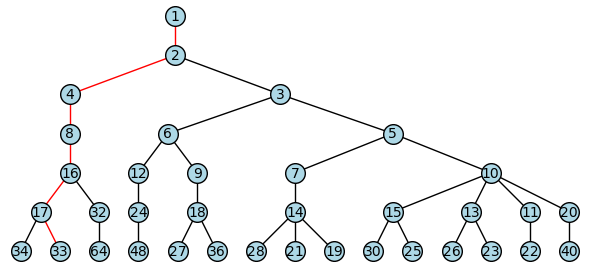

In [12]:
PrintTree(BuildTree(6), 33)

Построим дерево до 5-го уровня и выделим путь до вершины $n = 9$:

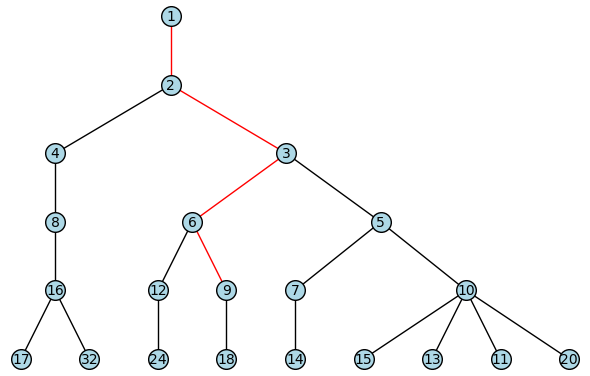

In [13]:
PrintTree(BuildTree(5), 9)

Получим цепочку вычисления $x^{33}$ с помощью дерева степеней:

In [14]:
GetPathToNode(BuildTree(6), 33)

[1, 2, 4, 8, 16, 17, 33]

Так, получили цепочку $x, x^2, x^4, x^8, x^{16}, x^{17}, x^{33}$.

Сравним данный метод с методом $SX$. Напишем функцию, возвращающую количество операций умножения для бинарного метода $SX$:

In [15]:
def GetAmountOfOperationsSX(n):
    return floor(log(n, 2)) + bin(n)[2:].count('1') - 1

Для того, чтобы сравнить бинарный метод и дерево степеней, модифицируем функцию построения дерева (теперь учитываем, что есть конкретное число $n$, до которого нужно посчитать количество шагов). Добавим счётчик количества умножений и флаг, обрывающий выполнение перебора, если $n$ найдено:

In [16]:
def BuildTreeAndGetOpsAmount(nodeToFind):
    operationCounter = 0
    nodeFound = False
    tree = {1:[]} 
    cur_level_nodes = [1]
    while nodeFound is False:
        operationCounter += 1
        next_level_nodes = []
        for parent in cur_level_nodes:
            for elem_in_chain in GetPathToNode(tree, parent):
                potential_child = parent + elem_in_chain
                if potential_child == nodeToFind:
                    nodeFound = True
                if potential_child not in tree:
                    tree[potential_child] = [parent]
                    next_level_nodes.append(potential_child)
        cur_level_nodes = next_level_nodes
    return operationCounter

Утверждаем, что дерево степеней не проигрывает бинарному методу (проверим до $n = 5000$).

In [17]:
allGoodFlag = True
for n in range(2, 5000):
    if GetAmountOfOperationsSX(n) < BuildTreeAndGetOpsAmount(n):
        allGoodFlag = False
        break
if allGoodFlag: show("Утверждение корректно!")
else: show("Всё плохо!")

'Утверждение корректно!'

#### Вывод
Таким образом, реализован алгоритм "дерева степеней". Получилось отобразить дерево средствами *SageMath* до заданного уровня *k*, выделить цветом путь от вершины дерева до заданного числа *n*. В результате сравнения данного метода с бинарным $SX$ - получили, что дерево степеней ему не проигрывает (а следовательно выигрывает метод справа налево). Помимо этого, дерево степеней лучше метода множителей (лучше относительно использованного количества умножений).

### 6. Изменённое дерево степеней

Внесём незначительные изменения в определение дерева степеней. Сделаем так, чтобы узлы, расположенные ниже узла $i$ присоединялись в порядке убывания:<br>
$i+a_{k-1}, ..., i+a_{1},i+a_{0}$<br>
Получится дерево убывающих степеней. Модифицируем функцию получения узлов, расположенных ниже $i$, чтобы она отвечала условию выше:

In [18]:
def GetPathToNode(tree, node):
    chain = [node]
    while node != 1:
        node = tree[node][0]
        chain.append(node)
    return chain

Продемонстрируем работу программы. Построим дерево до 6-го уровня и выделим путь до вершины $n=33$:

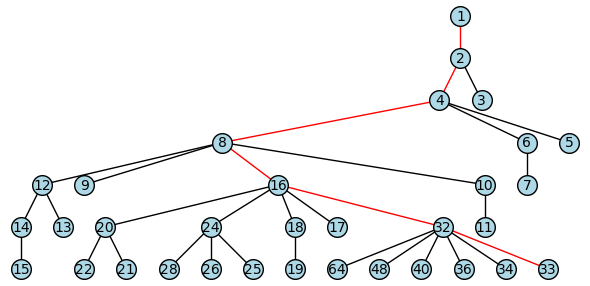

In [19]:
PrintTree(BuildTree(6), 33)

Построим дерево до 5-го уровня и выделим путь до вершины $n = 9$:

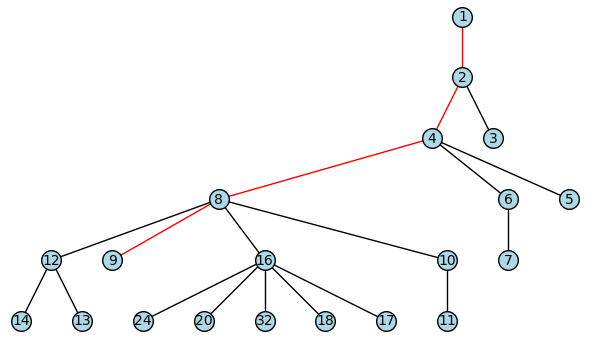

In [20]:
PrintTree(BuildTree(5), 9)

Покажем на практике, что изменённое дерево затрачивает столько же операций умножений, сколько и бинарный метод (проверим до $n = 5000)$:

In [21]:
allGoodFlag = True
for n in range(2, 5000):
    if GetAmountOfOperationsSX(n) != BuildTreeAndGetOpsAmount(n):
        allGoodFlag = False
        break
if allGoodFlag: show("Утверждение корректно!")
else: show("Всё плохо!")

'Утверждение корректно!'

## Выводы

Сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций, привит навык использования системы компьютерной алгебры *SageMath* для реализации алгоритмов.<br>
Реализован бинарный метод $SX$, бинарный метод возведения в степень справа налево, рассмотрен метод множителей и реализован алгоритм "дерева степеней". Алгоритмы проверены на работоспособность, произведено сравнение с теоретическими положениями.<br>
Реализовано дерево убывающих степеней, произведено сравнение с бинарным методом $SX$.<br>